In [ ]:
!nvidia-smi
# to check if gpu has been alotted ?

Sat Aug 26 04:31:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Installing Yolo v8


In [ ]:
# installing through pip from official library

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
# installing roboflow package 
# need to restart the runtime after this
!pip install roboflow

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


# importing package from roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="7QNiL1B5kbQBsX5Oc39e")
project = rf.workspace("aizen").project("og_dataset_final")
dataset = project.version(2).download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`

Extracting Dataset Version Zip to og_dataset_final-2 in yolov8:: 100%|██████████| 5190/5190 [00:01<00:00, 2870.85it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=valid model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 batch=64 imgsz=640 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/og_dataset_final-2/data.yaml, epochs=100, patience=50, batch=64, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dyn

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch3060.jpg
events.out.tfevents.1693024442.513a5d9a6f20.1546.0  train_batch3061.jpg
F1_curve.png					    train_batch3062.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


In [ ]:
!yolo task=detect mode=val model=yolov8s.pt data={dataset.location}/data.yaml

2023-08-26 07:09:49.453351: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 07:09:50.332358: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
val: Scanning /content/datasets/og_dataset_final-2/valid/labels.cache... 291 images, 0 backgrounds, 0 corrupt: 100% 291/291 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [00:04<00:00,  4.44it/s]
                   all        291        397     0.0335    0.00818     0.0176    0.00528
                person        

/content


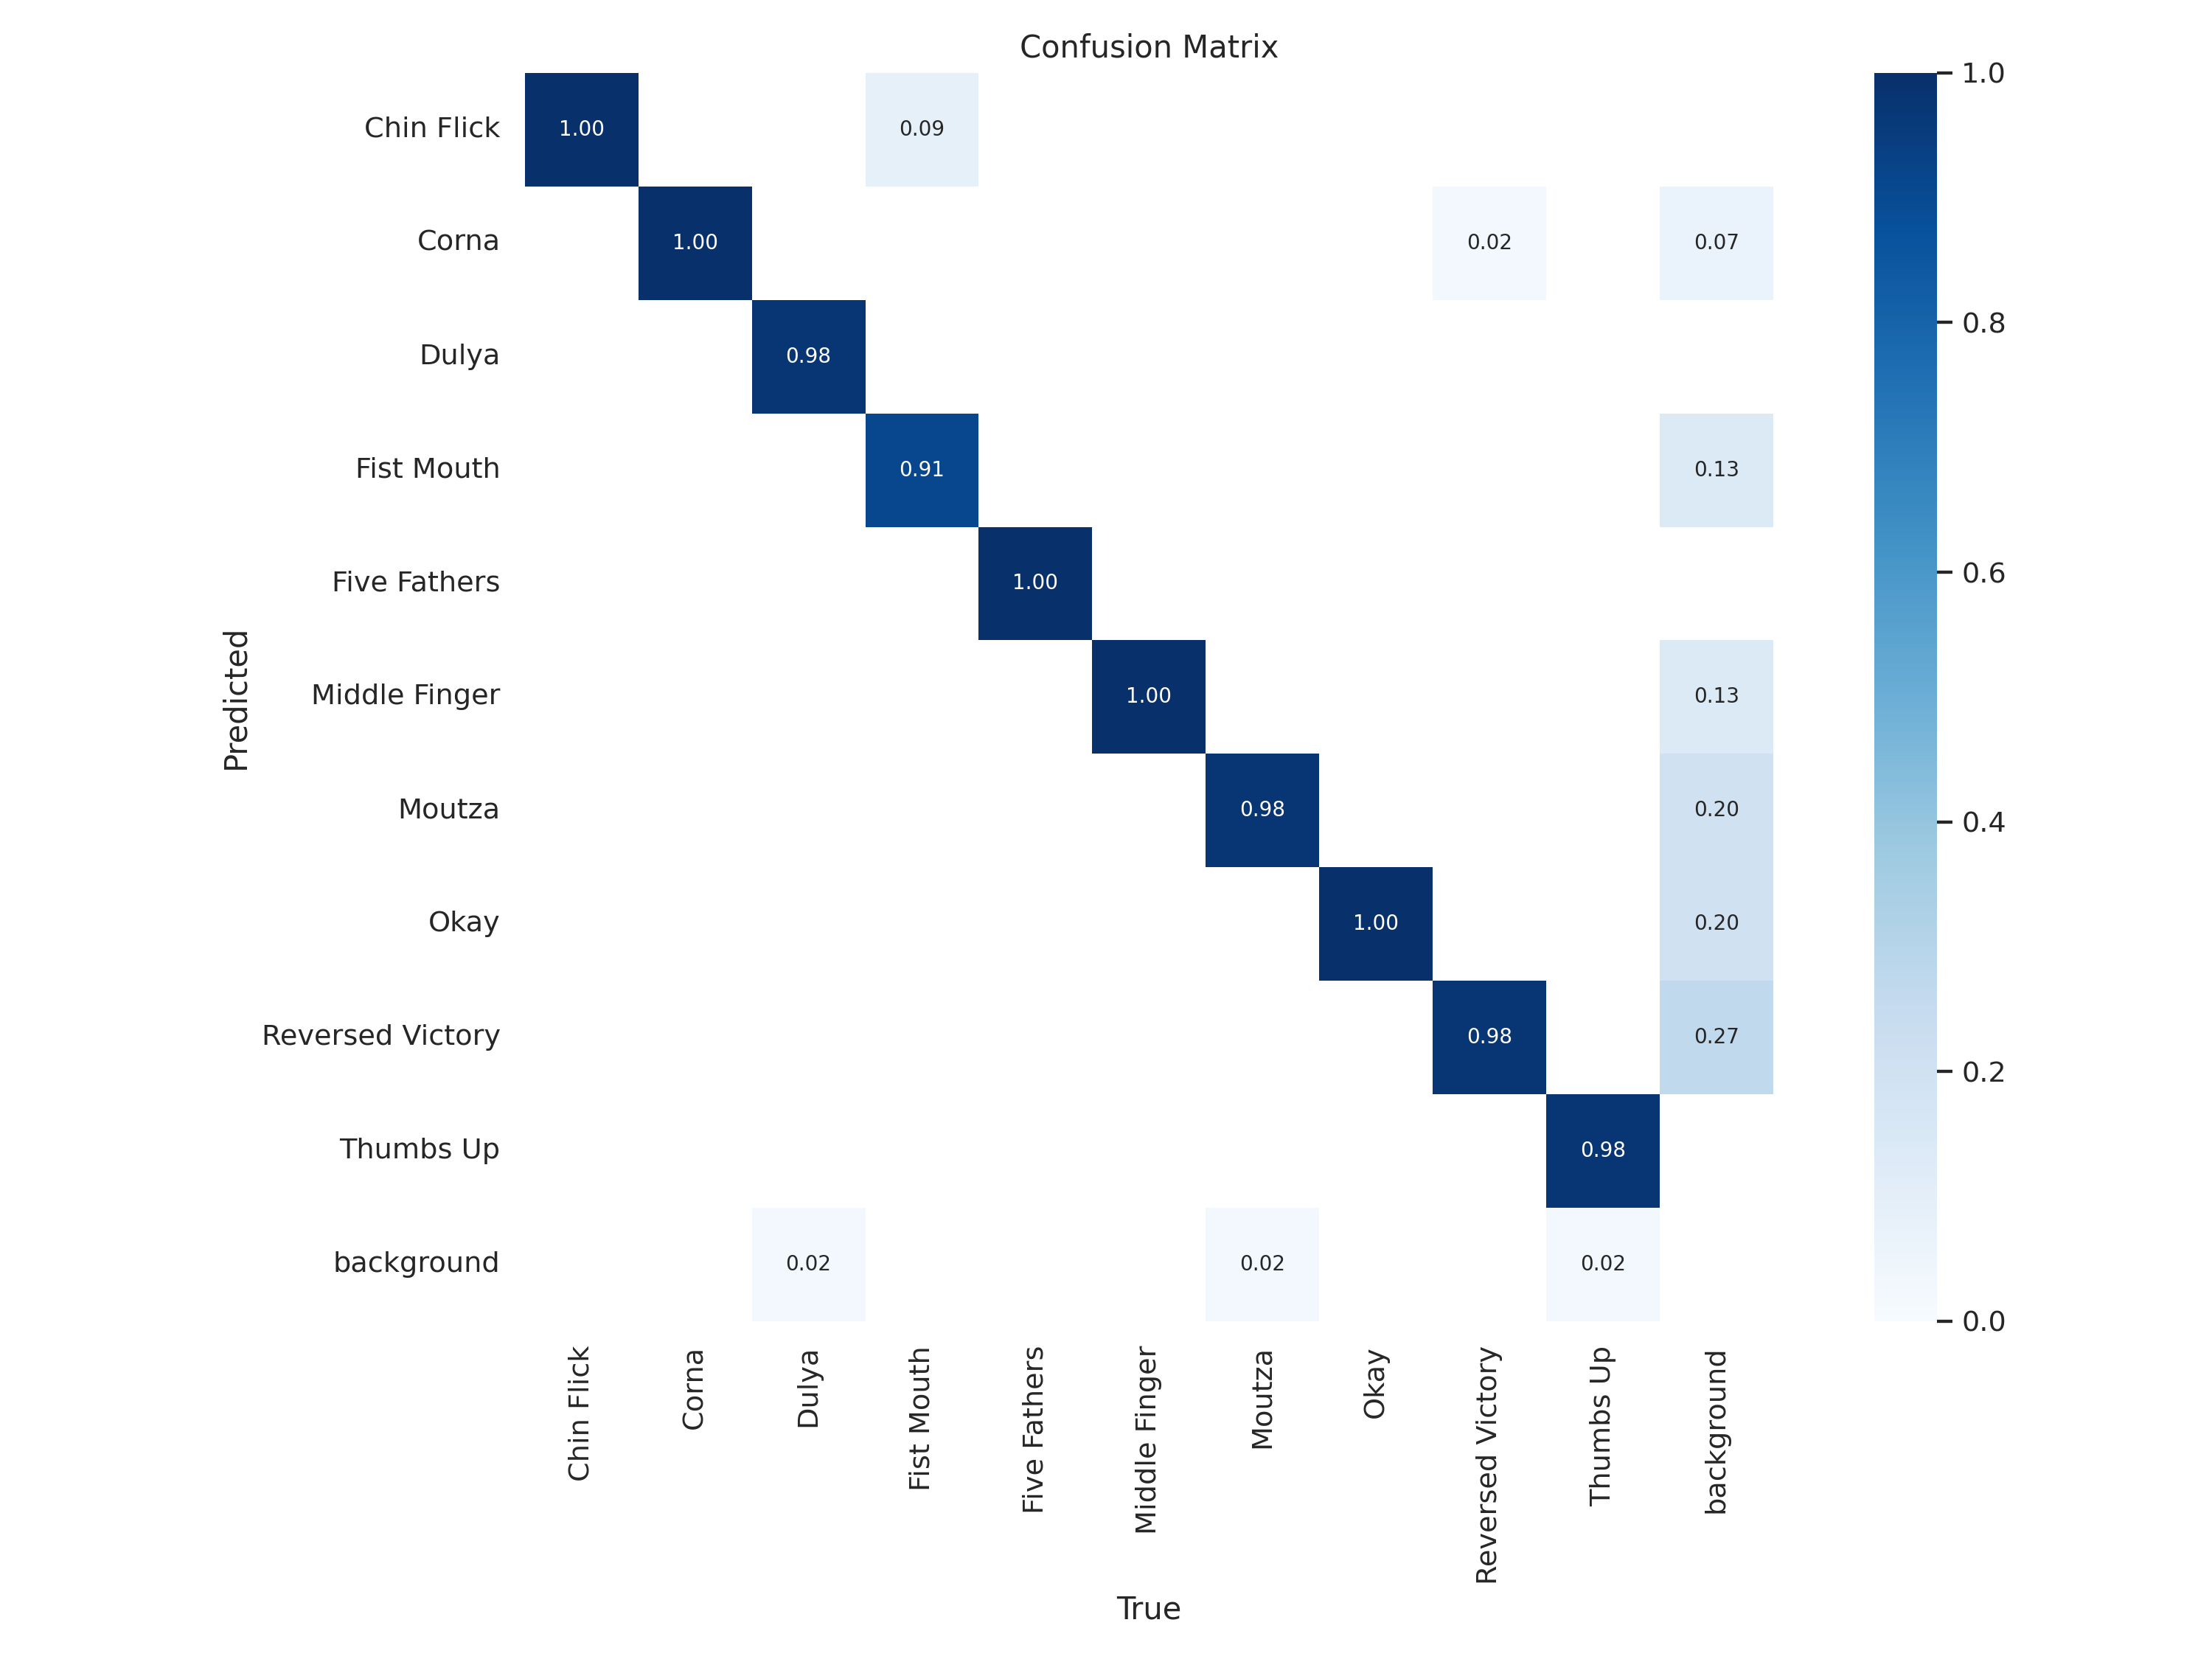

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


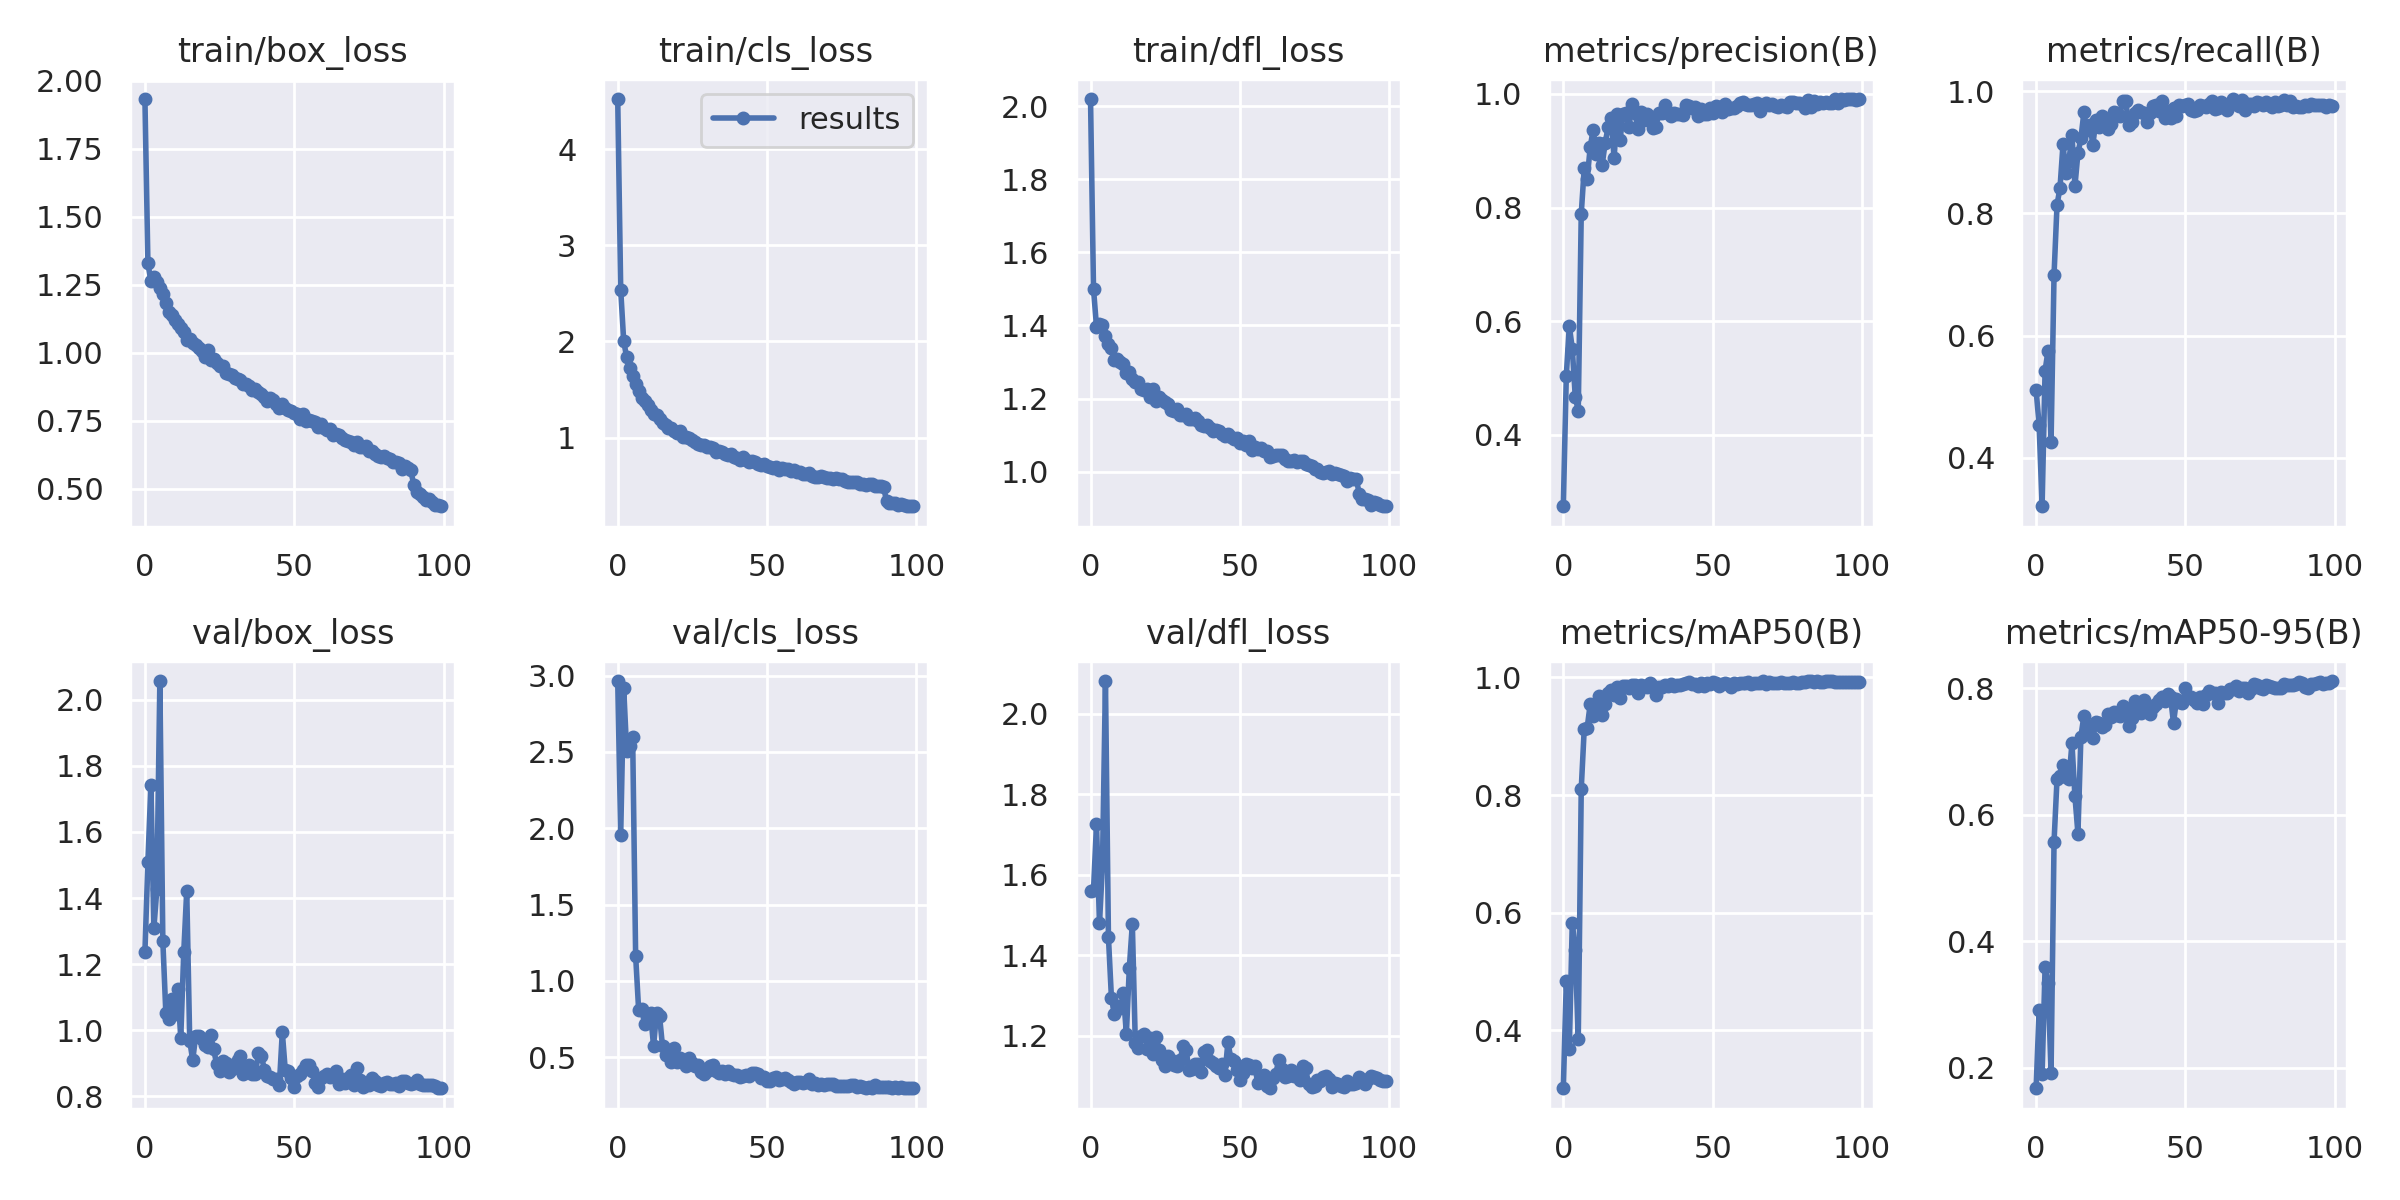

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


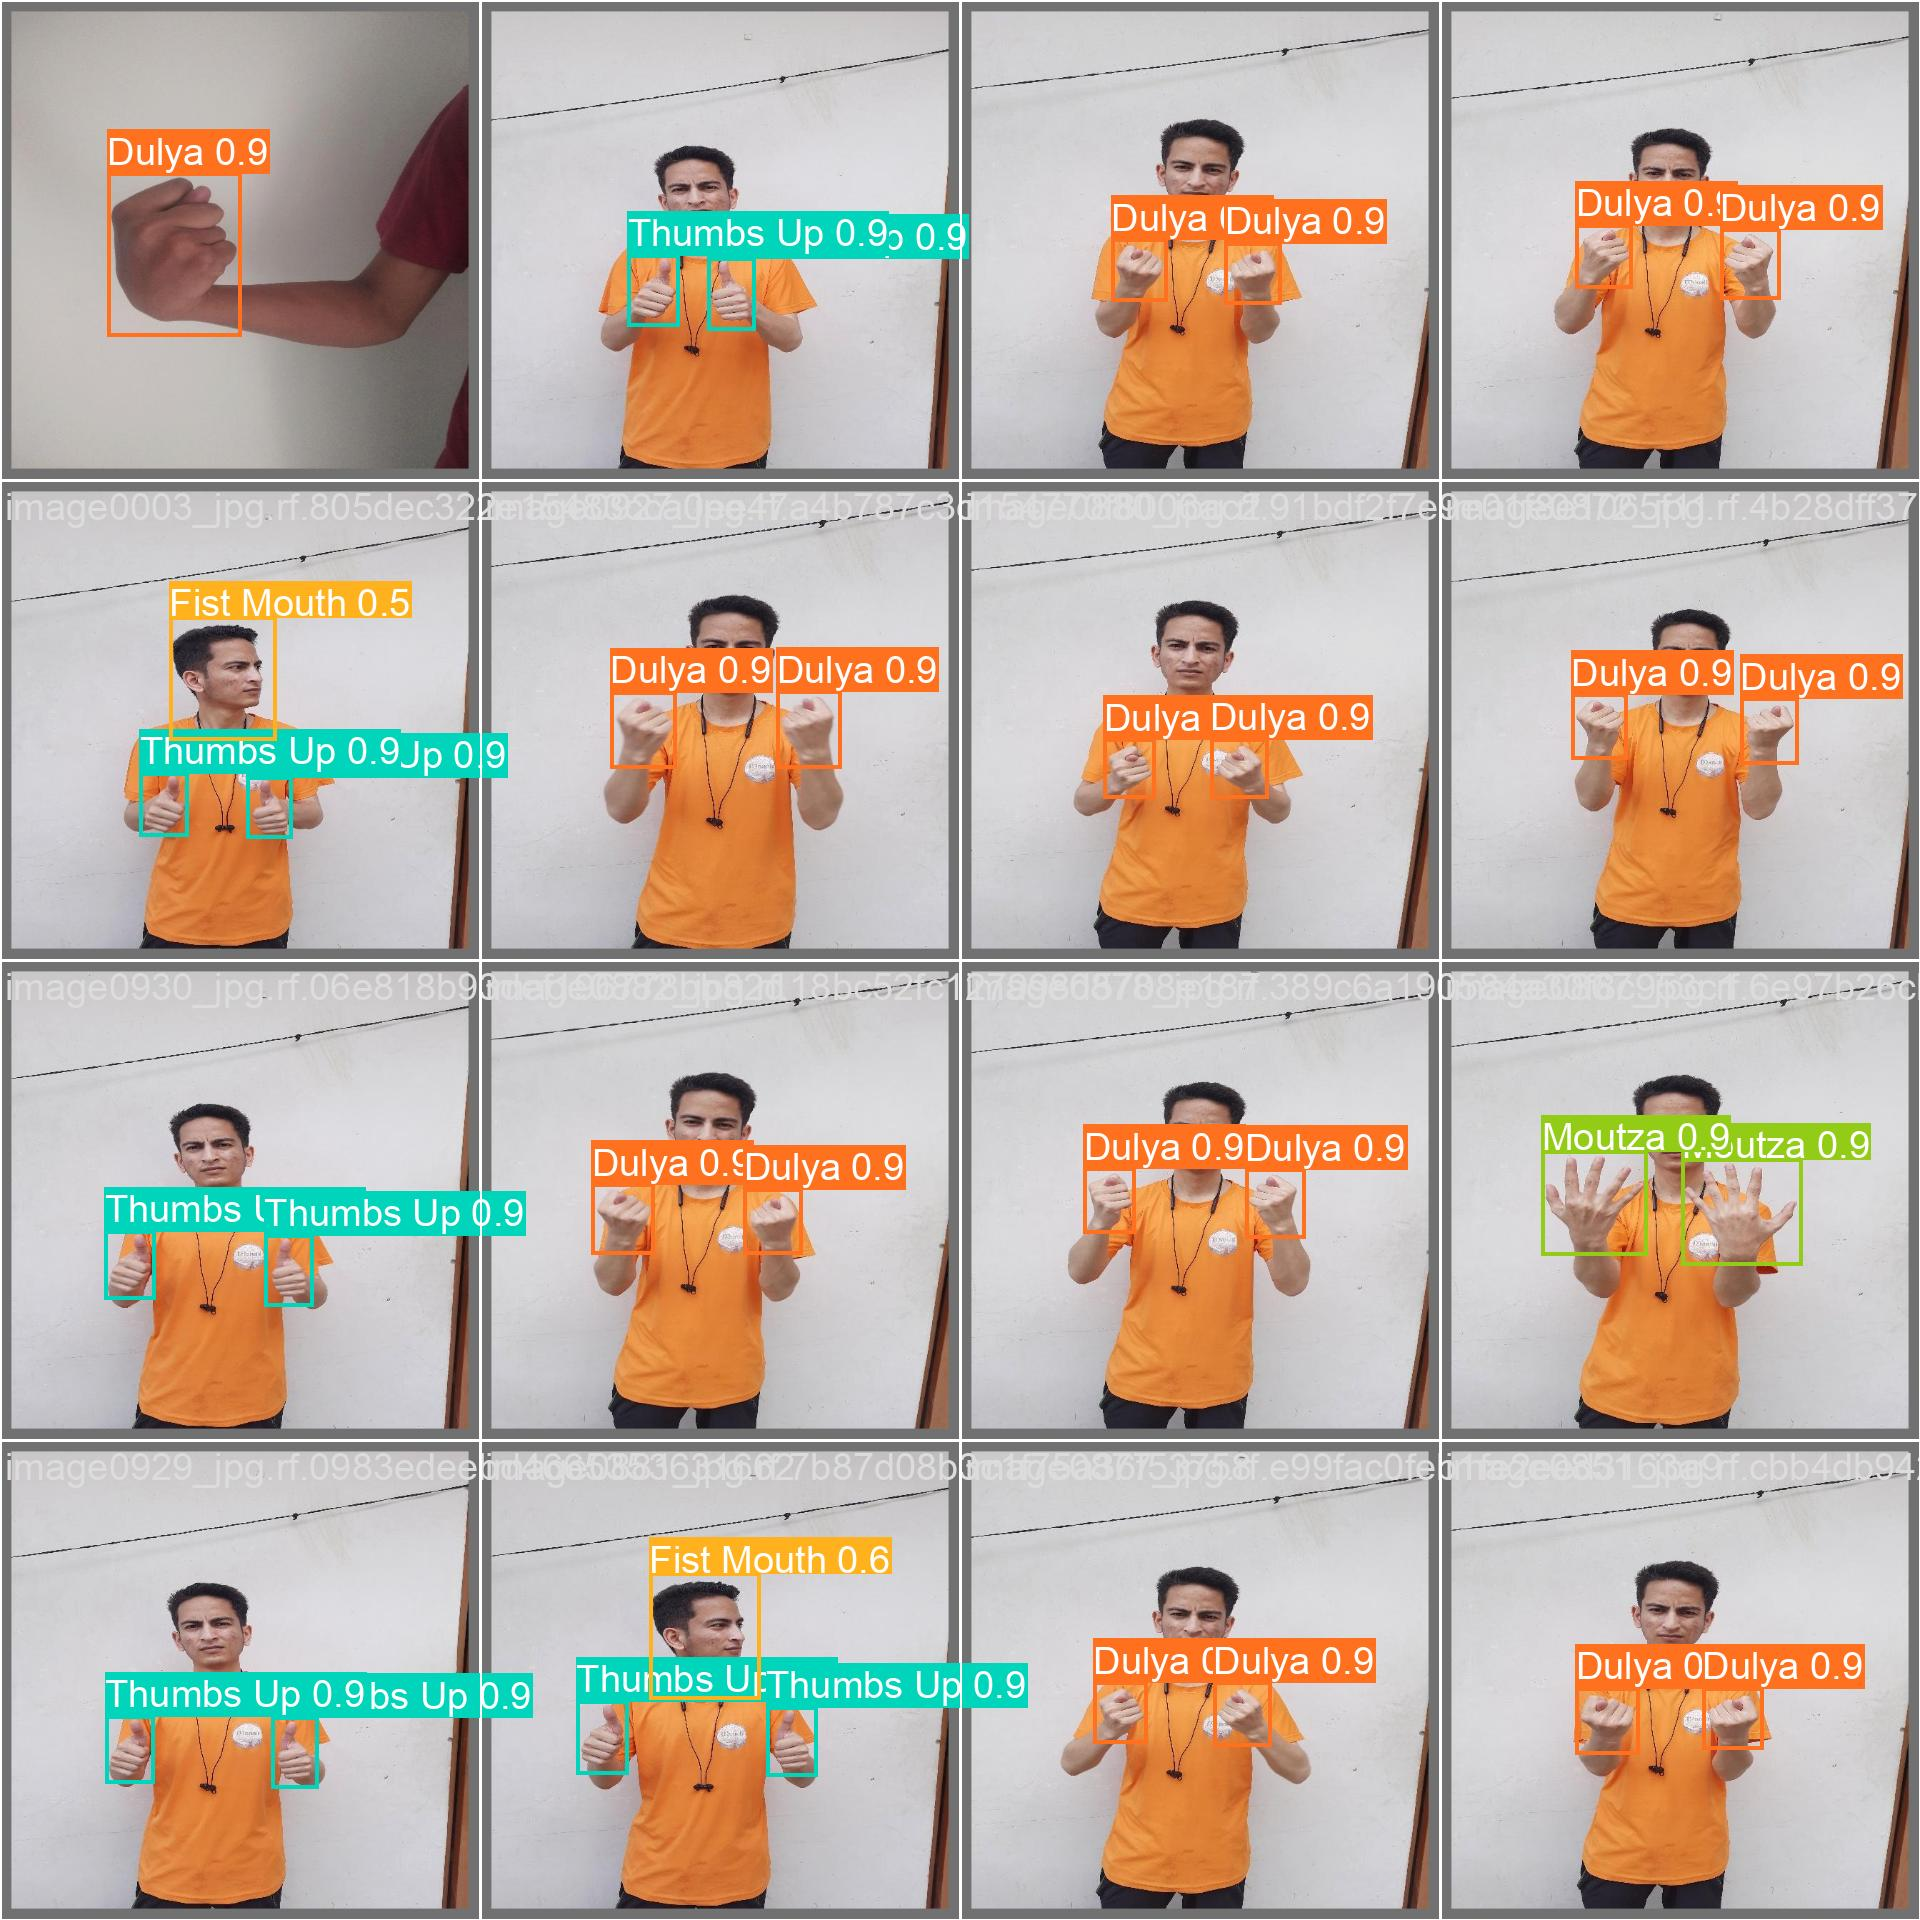

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-08-26 07:23:27.505615: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 07:23:28.351085: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/og_dataset_final-2/valid/labels... 159 images, 0 backgrounds, 0 corrupt: 100% 159/159 [00:00<00:00, 2002.37it/s]
val: New cache created: /content/datasets/og_dataset_final-2/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:05<00:00,  1.95it/s]
                   all      

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/moutza.jpeg save=True

/content
2023-08-26 07:22:15.092778: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 07:22:16.038687: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs
image 1/1 /content/moutza.jpeg: 448x640 2 Moutzas, 64.0ms
Speed: 0.6ms pre-process, 64.0ms inference, 83.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


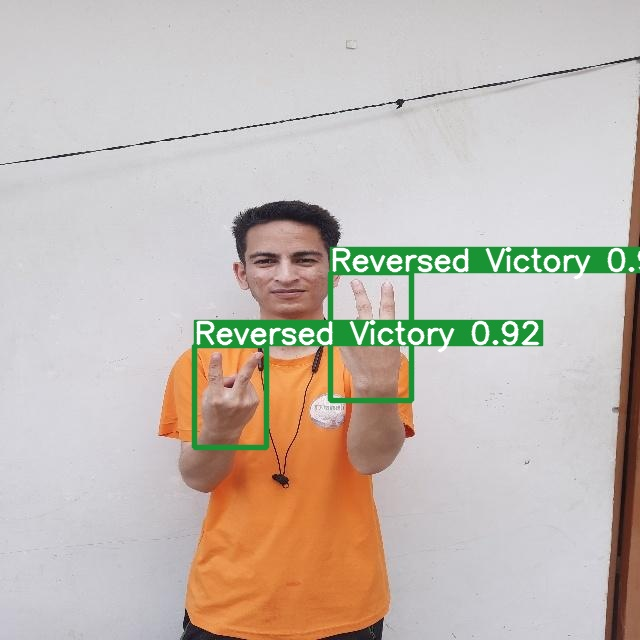

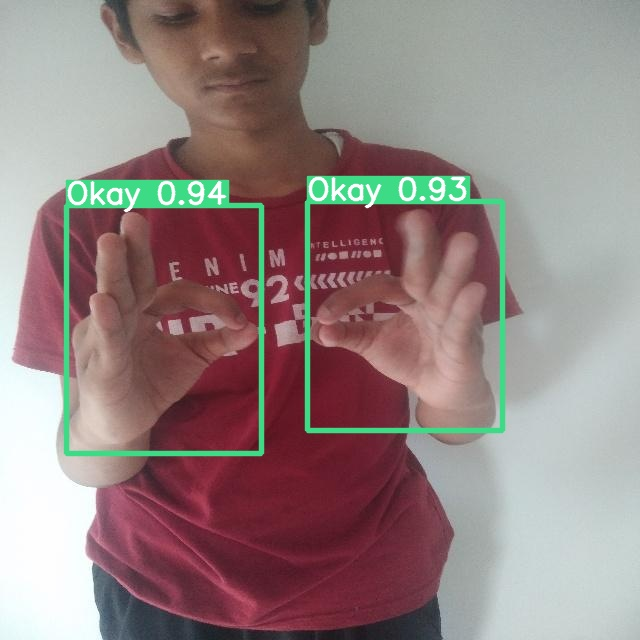

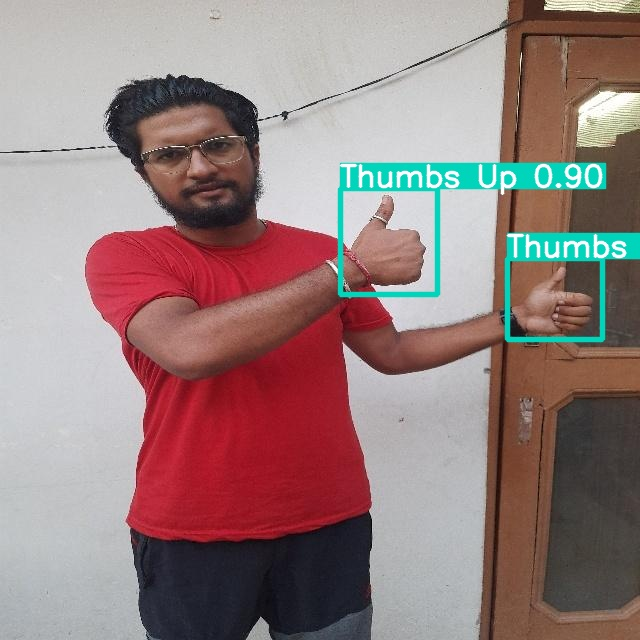

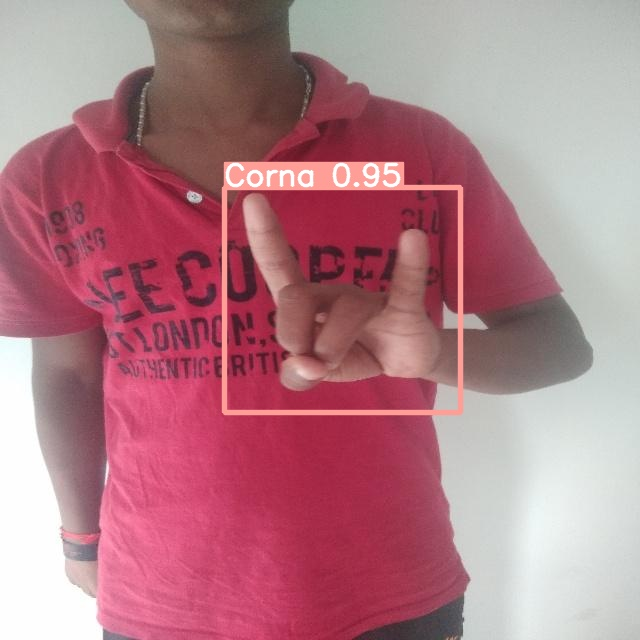

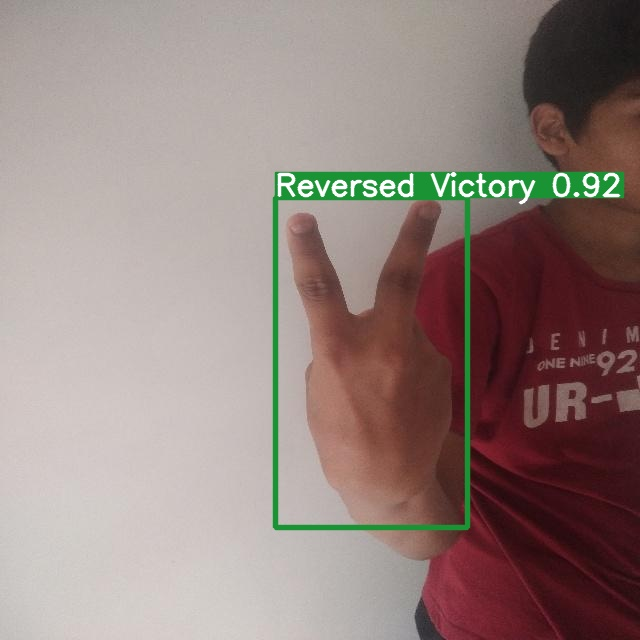

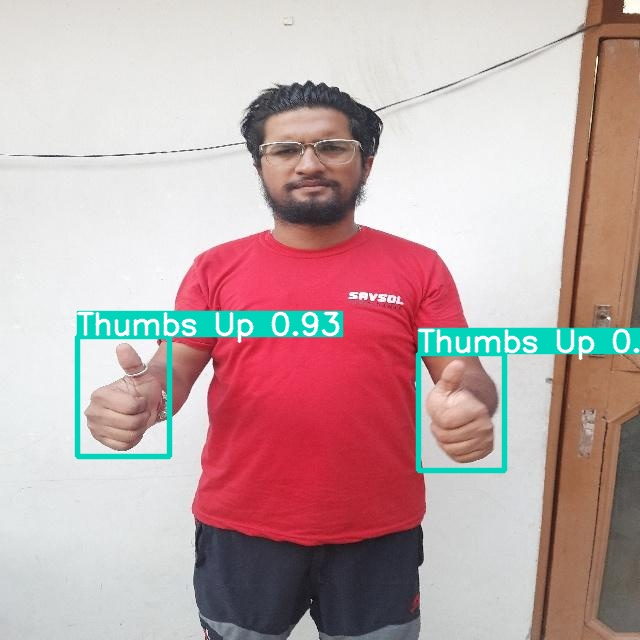

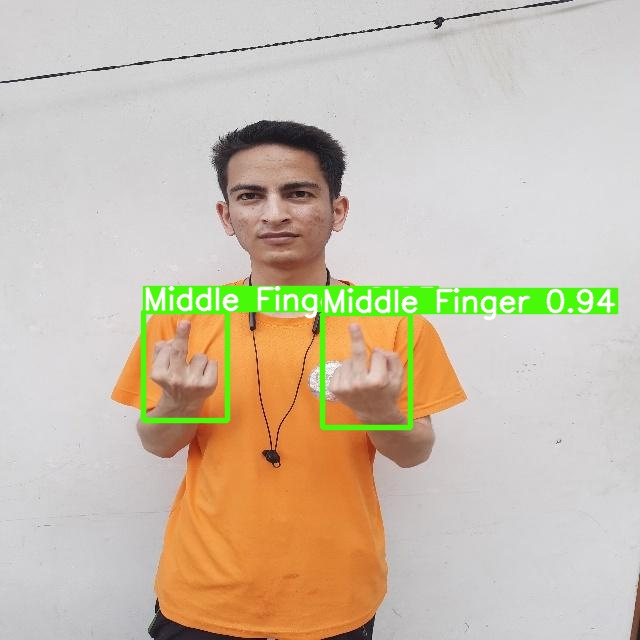

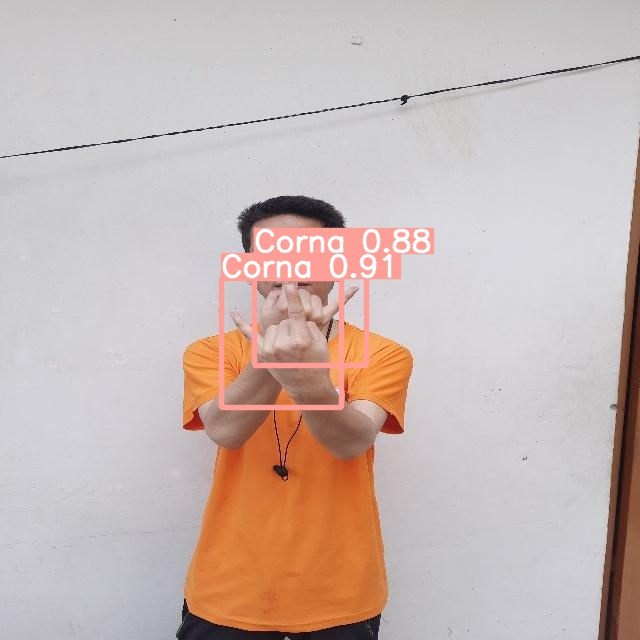

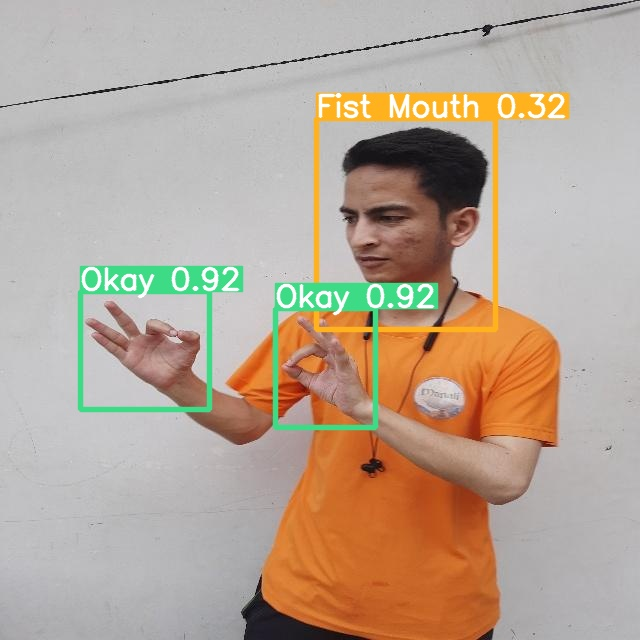

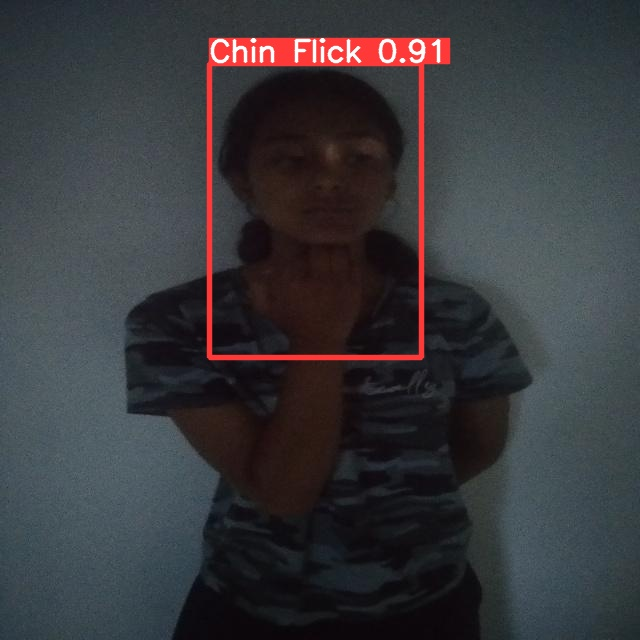

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!zip -r /content/trainYolov8test.zip /content/runs/detect/val3
# to download the files for further analysis

  adding: content/runs/detect/val3/ (stored 0%)
  adding: content/runs/detect/val3/val_batch1_pred.jpg (deflated 13%)
  adding: content/runs/detect/val3/P_curve.png (deflated 15%)
  adding: content/runs/detect/val3/confusion_matrix.png (deflated 22%)
  adding: content/runs/detect/val3/val_batch2_labels.jpg (deflated 12%)
  adding: content/runs/detect/val3/F1_curve.png (deflated 10%)
  adding: content/runs/detect/val3/PR_curve.png (deflated 22%)
  adding: content/runs/detect/val3/R_curve.png (deflated 12%)
  adding: content/runs/detect/val3/val_batch0_pred.jpg (deflated 14%)
  adding: content/runs/detect/val3/val_batch0_labels.jpg (deflated 14%)
  adding: content/runs/detect/val3/val_batch1_labels.jpg (deflated 14%)
  adding: content/runs/detect/val3/val_batch2_pred.jpg (deflated 12%)
